# DS102 | In Class Practice Week 3C - Data Visualisation II
<hr>

## Learning Objectives
At the end of the lesson, you will be able to:

- create histograms using `matplotlib` library and `seaborn` library

- use `pd.cut()` to store values in each bin and use the result to interpret a histogram plot

- create a stacked bar chart using `matplotlib` library and `seaborn` library

- create multiple plots in the same diagram using `add_subplot()`

- create a wordcloud using the `wordcloud` library

- plot a `jointplot` to show the joint distributions of 2 metrics


## Datasets Required for this In Class

In the order they are introduced: 
1. `loans-25k.csv`

2. `loans-descs-100.csv`

In [6]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.2f}'.format
# Plot inline in Jupyter notebook
%matplotlib inline
# Settings throughout the notebook
sns.set()
# Width = 16, Height = 6
DIMS=(16, 6)

import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install wordcloud

Read from `loans-25k.csv` into `loans_df`. Find the properties of the `loans_df`.

In [10]:
## Dataset 1: Credits at the end of the notebook
loans_df = pd.read_csv('loans-25k.csv')
display(loans_df.describe())
display(loans_df.info())
display(loans_df.head())

,id,member_id,annual_inc,loan_amnt,int_rate
count,"25,000.00","25,000.00","25,000.00","25,000.00","25,000.00"
mean,"32,487,958.73","35,026,395.76","74,928.08","14,696.63",13.23
std,"22,836,729.65","24,123,577.50","53,596.50","8,445.25",4.36
min,"57,245.00","98,268.00",0.00,500.00,5.32
25%,"9,252,315.00","11,030,127.75","45,000.00","8,000.00",9.99
50%,"34,423,708.50","37,086,239.00","64,000.00","12,837.50",12.99
75%,"54,931,015.75","58,484,786.50","90,000.00","20,000.00",16.20
max,"68,616,060.00","73,518,868.00","2,548,000.00","35,000.00",28.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
id                25000 non-null int64
member_id         25000 non-null int64
annual_inc        25000 non-null float64
home_ownership    25000 non-null object
purpose           25000 non-null object
loan_amnt         25000 non-null float64
int_rate          25000 non-null float64
term              25000 non-null object
grade             25000 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 1.7+ MB


None

,id,member_id,annual_inc,home_ownership,purpose,loan_amnt,int_rate,term,grade
0,63459002,67801839,"131,000.00",MORTGAGE,credit_card,"35,000.00",8.18,36 months,B
1,2224979,2637150,"125,000.00",MORTGAGE,debt_consolidation,"29,700.00",15.31,60 months,C
2,5979460,7451906,"36,070.00",MORTGAGE,debt_consolidation,"6,700.00",7.90,36 months,A
3,57126822,60829645,"90,000.00",RENT,credit_card,"18,000.00",8.18,60 months,B
4,1445209,1697667,"90,000.00",MORTGAGE,small_business,"18,000.00",7.62,36 months,A


## Histogram

A histogram is used to plot the **count** of individual observations within a bin. Each bin has **a specified range** as determined by the position and width of the bar.

Note: If you see the warning `The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.`, you can ignore it.

https://seaborn.pydata.org/generated/seaborn.distplot.html

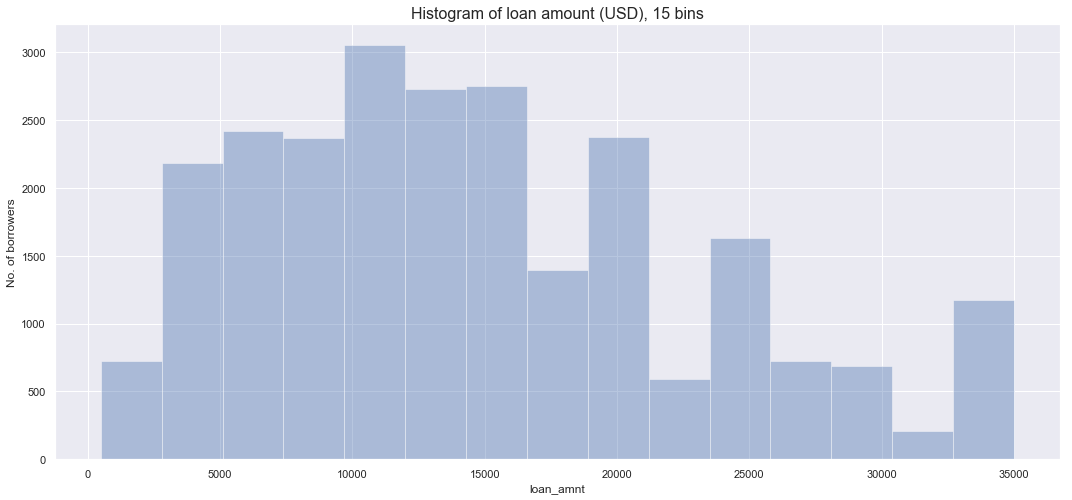

In [19]:
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(111)

# Plot a histogram for 'loan_amnt'. Use 15 bins.
# Use sns.distplot here. Also, set kde=False as we do not need the Kernel Density Estimate plot shape.
# Remember to pass in the axes object.
sns.distplot(loans_df['loan_amnt'], kde=False, ax=ax1, bins=15)

# Set the title and y-axis label.
ax1.set_title("Histogram of loan amount (USD), 15 bins", fontsize=16)
ax1.set_ylabel("No. of borrowers")

plt.show()

To understand the left and right limits of each bin, use `pd.cut(Series, bins=bins)`. Store the output in a new column `loan_amnt_bin`. 

In [28]:
# Fill in parameters for pd.cut(), applying it on 'loan_amnt' column. Use 15 bins.
loans_df_bin = loans_df.copy()
loans_df_bin['loan_amnt_bin'] = pd.cut(loans_df_bin['loan_amnt'], bins = 15)
loans_df_bin.head()

,id,member_id,annual_inc,home_ownership,purpose,loan_amnt,int_rate,term,grade,loan_amnt_bin
0,63459002,67801839,"131,000.00",MORTGAGE,credit_card,"35,000.00",8.18,36 months,B,"(32700.0, 35000.0]"
1,2224979,2637150,"125,000.00",MORTGAGE,debt_consolidation,"29,700.00",15.31,60 months,C,"(28100.0, 30400.0]"
2,5979460,7451906,"36,070.00",MORTGAGE,debt_consolidation,"6,700.00",7.90,36 months,A,"(5100.0, 7400.0]"
3,57126822,60829645,"90,000.00",RENT,credit_card,"18,000.00",8.18,60 months,B,"(16600.0, 18900.0]"
4,1445209,1697667,"90,000.00",MORTGAGE,small_business,"18,000.00",7.62,36 months,A,"(16600.0, 18900.0]"


Counting the number of observations in each bin, gives the height of each bar in the histogram. The limits of each bin determine the position and width of the bar in the histogram. Use `df.groupby()` and `size()` to get the number of observations in each bin. 

In [29]:
df_bins_count = loans_df_bin.groupby('loan_amnt_bin').size().reset_index(name='n')
df_bins_count

,loan_amnt_bin,n
0,"(465.5, 2800.0]",755
1,"(2800.0, 5100.0]",2162
2,"(5100.0, 7400.0]",2419
3,"(7400.0, 9700.0]",2367
4,"(9700.0, 12000.0]",4436
5,"(12000.0, 14300.0]",1340
6,"(14300.0, 16600.0]",2743
7,"(16600.0, 18900.0]",1400
8,"(18900.0, 21200.0]",2373
9,"(21200.0, 23500.0]",596


## Stacked Bar Chart

A stacked bar chart can be used to see the number of observations within a cohort, and the cohort's cumulative sum. In this case, we want to see how many loans belonging to each grade divided by its different loan terms. Hence, we group the data by these 2 columns. Use `df.groupby()` and `size()` to perform this counting. Note that `df.groupby()` can take also take in a `list` as its parameter.

In [30]:
term_grade_loans_df = loans_df.copy()
term_grade_loans_df = term_grade_loans_df[['id', 'term', 'grade']]

# This line uses groupby() to count the number of loans belonging to each term and grade
term_grade_loans_agg = term_grade_loans_df.groupby(['term', 'grade']).size().reset_index(name="No. of Loans")
term_grade_loans_agg.head()

,term,grade,No. of Loans
0,36 months,A,4033
1,36 months,B,6015
2,36 months,C,4582
3,36 months,D,2183
4,36 months,E,626


With the aggregated `term_grade_loans_df`, now, represent each `term` as one column. Then, have one column for `36 months` and one column for `60 months` respectively. Additionally, add a column for `grade`. Use `pd.pivot_table()` for this step.

In [33]:
# Complete the pivot_table() method so that rows and columns and 'grade' and 'term' respectively. 
# Here, we are interested in the total number of loans for each grade and term
term_grade_loans_pivot = pd.pivot_table(term_grade_loans_agg, index=['grade'], columns=['term'],
                                        values='No. of Loans', aggfunc= np.sum)

# This chunk resets the index and set the column names to: 'grade', '36 months', '60 months'
term_grade_loans_pivot = term_grade_loans_pivot.reset_index()
term_grade_loans_pivot.columns = ['grade', '36_months', '60_months']
term_grade_loans_pivot

,grade,36_months,60_months
0,A,4033,139
1,B,6015,1179
2,C,4582,2371
3,D,2183,1737
4,E,626,1379
5,F,108,504
6,G,19,125


### A Small Detour: Multiple subplots

Before plotting the stacked bar graph, plot the individual bar graphs. To have the same plots side-by-side, use `fig.add_subplot()`.

There are 3 parameters for this function, all as `int`s. The first is the number of rows, the second is number of columns and the last is the position of the plot. From the top-left, the plots are numbered from 1 and increase as you move right, when the rightmost plot is reached, go to the next row and start from the left again. 

In this example, there is 1 row and 2 columns. The first plot (position `1`) is the plot on the left and the second plot (position `2`) is the plot on the right. Each of them will be assigned to an `AxePlot` with variables `ax1` and `ax2`.

Note that when you create individual plots, set the `ax` parameter to the `ax1` or `ax2` variable. 

Also, when plots are side-by-side, **the $y$-axis should reflect the same scale**.

https://seaborn.pydata.org/generated/seaborn.barplot.html

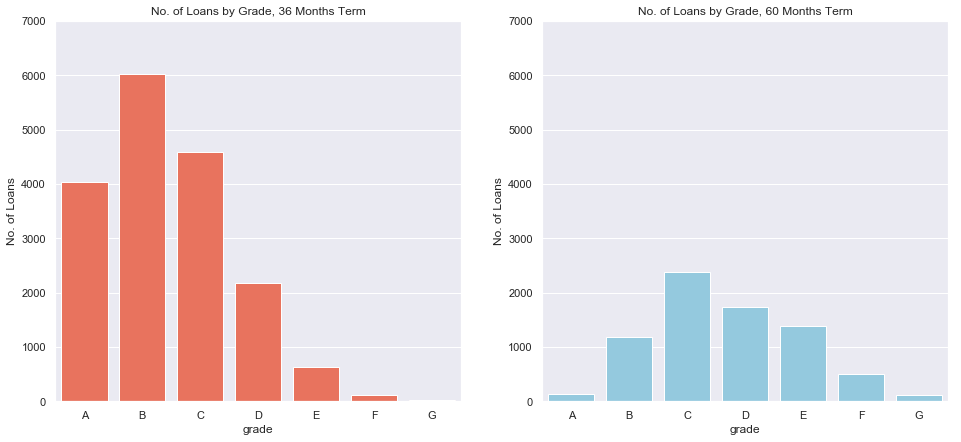

In [35]:
fig = plt.figure(figsize=(16, 7))

# Recap: explanation for fig.add_subplot()
# The first number is the no. of rows. 
# The second number is the no. of columns.
# The third number is the plot number. Count right, then count down.
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Complete sns.barplot() to plot for 36 months with color 'tomato'
sns.barplot(x=term_grade_loans_pivot['grade'], y=term_grade_loans_pivot['36_months'], ax=ax1, color='tomato')
ax1.set_ylabel("No. of Loans")
ax1.set_title("No. of Loans by Grade, 36 Months Term")

# Complete sns.barplot() to plot for 60 months with color 'skyblue'
sns.barplot(x='grade', y='60_months', ax=ax2, data=term_grade_loans_pivot, color='skyblue')
ax2.set_title("No. of Loans by Grade, 60 Months Term")
ax2.set_ylabel("No. of Loans")

# Set the scale of the plots to be the same.
ax1.set_yticks(np.arange(0, 7500, 1000))
ax2.set_yticks(np.arange(0, 7500, 1000))

# Show the graph
plt.show()

To plot the stacked bar graph, simply use `stacked=True` when you plot the graph from the `DataFrame`. Note that for this, the column that you would like to be the $x$-axis **needs** to be the index. Set the index by using `set_index`.

In [36]:
term_grade_loans_pivot_grade_i = term_grade_loans_pivot.set_index('grade')
term_grade_loans_pivot_grade_i

,36_months,60_months
grade,,
A,4033,139
B,6015,1179
C,4582,2371
D,2183,1737
E,626,1379
F,108,504
G,19,125


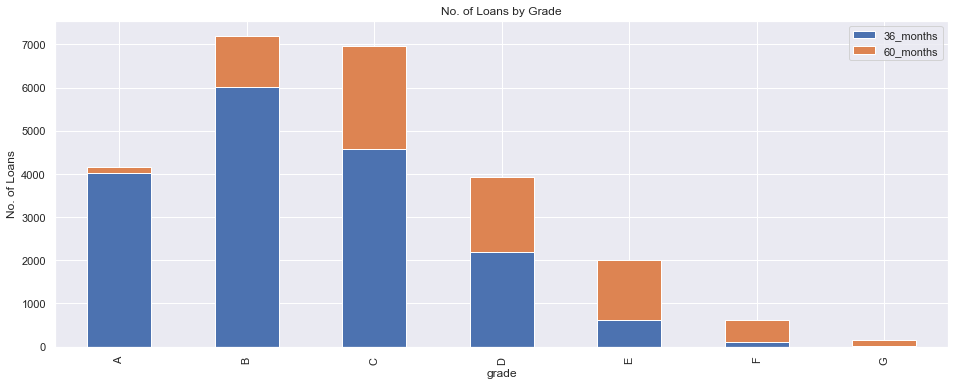

In [37]:
# Run this chunk to plot the stacked bar chart here. Note that stacked=True
fig, ax1 = plt.subplots()
term_grade_loans_pivot_grade_i.plot(kind='bar', stacked=True, figsize=DIMS, 
                                    title="No. of Loans by Grade", ax=ax1)
ax1.set_ylabel("No. of Loans")
plt.show()

## Wordcloud

A wordcloud is useful to find out what are common words in a corpus of texts. A corpus is simply a collection of text documents. Before building a wordcloud, first collect all the texts.

https://amueller.github.io/word_cloud/auto_examples/colored.html

In [38]:
# Dataset 2: Credits at the end of the notebook
desc_df = pd.read_csv('loans-descs-100.csv', sep='|')
desc_df.sample(3) # Sample 3 of the records

,id,member_id,loan_amnt,grade,desc
97,8876088,6787526,"10,000.00",C,Borrower added on 11/11/13 > this loan is to...
21,10607404,12479401,"12,000.00",B,Borrower added on 01/15/14 > MY LOAN WILL BE...
93,1279431,1522096,"17,600.00",D,Borrower added on 05/04/12 > Trying to elimi...


In [39]:
descriptions_series = desc_df['desc']

In [40]:
# Repeatedly execute this cell to look at the text of each desc.
descriptions_series.sample(1).iloc[0]

"  Borrower added on 11/06/12 > I have too many credit card accounts.  It's like someone (me) kicked over a barrel full of squirrels.  I believe it is hurting my efforts to pay down debt.  This consolidation loan will be a huge blessing for me.  I am grateful for you consideration.<br><br>  Borrower added on 11/06/12 > I have too many credit card accounts. It's like someone (me) kicked over a barrel full of squirrels. I believe it is hurting my efforts to pay down debt. This consolidation loan will be a huge blessing for me. I am grateful for your consideration.<br>"

To build a wordcloud, all the descriptions need to be connected to form a long string. But, some cleaning needs to be done first. The next steps are used to collect these words:

1. Remove `Borrower added on.. >` in the beginning of the string
2. Remove HTML tags from the descriptions
3. Remove special characters from the descriptions. Remove trailing and leading spaces, convert all words to lower case

In [41]:
descriptions_list = descriptions_series.tolist() # convert series to list
descriptions_list[0:5]

['  Borrower added on 06/25/12 > I will use this loan to pay off credit cards and some other loans i have occured in the remodel of my house.<br>',
 '  Borrower added on 01/30/14 > This loan will be used for debt consolidation.<br>',
 '  Borrower added on 08/17/12 > Tell your story. What is your loan for?<br><br> Borrower added on 08/17/12 > Tell your story. What is your loan for?<br><br> Borrower added on 08/17/12 > paying  my  creditcards<br>',
 '  Borrower added on 05/29/13 > I wanted to pay off  all credit debt with low interest rate.<br>Thank you for your offer.<br>',
 '  Borrower added on 01/31/14 > consolidate my debt an get my life back on track.<br>']

In [42]:
clean_descriptions = []
for desc in descriptions_list:
    # Remove the first bunch of letters
    desc = re.sub('Borrower added on (\d/?)+\s>', '', desc)
    
    # Remove HTML tags
    desc = re.sub('<[a-z]+/?>', '', desc)
    
    # Remove special characters
    desc = re.sub('[-_,$&!.;%]', '', desc)
    
    # Convert to lower case, remove leading and trailing spaces
    desc = desc.strip().lower()
    
    clean_descriptions.append(desc)

clean_descriptions[0:5]

['i will use this loan to pay off credit cards and some other loans i have occured in the remodel of my house',
 'this loan will be used for debt consolidation',
 'tell your story what is your loan for?  tell your story what is your loan for?  paying  my  creditcards',
 'i wanted to pay off  all credit debt with low interest ratethank you for your offer',
 'consolidate my debt an get my life back on track']

Finally when all the words are cleaned, concatenate them to form a long string. Finally, use `WordCloud` to plot the wordcloud. Note that the larger the word, the more commmon the word appears in the corpus.

In [43]:
long_str_descriptions = " ".join(clean_descriptions)
long_str_descriptions[:500]

'i will use this loan to pay off credit cards and some other loans i have occured in the remodel of my house this loan will be used for debt consolidation tell your story what is your loan for?  tell your story what is your loan for?  paying  my  creditcards i wanted to pay off  all credit debt with low interest ratethank you for your offer consolidate my debt an get my life back on track the loan will be used to payoff credit cardsmy total minimum monthly payment on all cards is 357 the interest'

Now, we are ready to use our preprocessed text data to create a wordcloud!

https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

<Figure size 1080x576 with 0 Axes>

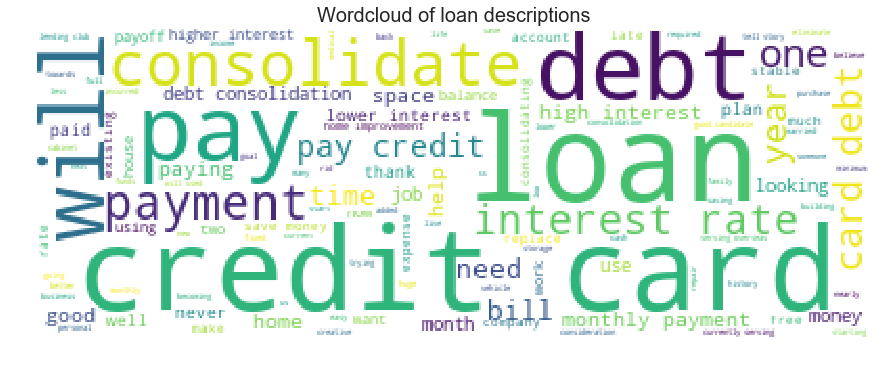

In [48]:
plt.figure(figsize=(15,8))

# create wordcloud here
plt.figure(figsize=(15,8))
wc = WordCloud(width=400, height=150, background_color="white", max_words=150, relative_scaling=0.5)
desc_wordcloud = wc.generate(long_str_descriptions)

plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of loan descriptions", fontsize=20)
plt.show()

## Self-Study: Jointplot

A jointplot is used to see the **joint observation** of datapoints. One axis will show the distribution of one metric while the other axis will show the distribution of the other metric. 

Each hexagon **exists in a 2 dimensional space** that represents a bin corresponding to the **<u>concurrent</u> observation of $X=x$ and $Y=y$**. In this plot, the darker the hexagon, the more observations are in that bin.

https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
## Dataset 1: Credits at the end of the notebook
loans_df = pd.read_csv('loans-25k.csv')
loans_df.head()

In [ ]:
fig = plt.figure()
# Plot the joint plot here. Set the x, y and kind='hex' parameter
g = sns.jointplot(data=loans_df, x = 'loan_amnt', y = 'int_rate', kind='hex')
# Set the size of the plot and the title.
g.fig.suptitle('Loan Amount vs. Interest Rate of loans')
g.fig.set_size_inches(8,8)
# Shrink the plot by 10% so the title is visible.
plt.subplots_adjust(top=0.9)

# Additional Exercises
## Exercise 1

Given `loans_df` which reads from the same dataset, plot a histogram where the $x$-axis represents the different types of `home_ownership` and the $y$-axis represents the number of loans whose members have that particular home ownership. Filter only for `home_ownership` with the values `'MORTGAGE', 'OWN', 'RENT'`.

In [ ]:
# Exercise 1
# Write your code here
l_df = pd.read_csv('loans-25k.csv')
l_df = l_df[l_df['home_ownership'].isin(['MORTGAGE', 'OWN', 'RENT'])]
l_df_agg = l_df.groupby('home_ownership').size().reset_index(name='No. of Loans')
ax = l_df_agg.plot(kind='bar', x='home_ownership', y='No. of Loans', 
              title="No. of Loans by Home Ownership", figsize=DIMS)
plt.ylabel("No. of Loans")
plt.xlabel("Type of Home Ownership")
plt.show()

## Exercise 2

Given `term_grade_loans_pivot` which has the number of loans in each grade, per term, plot a clustered bar graph where each cluster on the $x$-axis represents a grade and the $y$-axis represents the number of loans.

In [ ]:
# l_df_agg_pivot is given to you.
l_df = pd.read_csv('loans-25k.csv')
l_df_agg = l_df.groupby(['term', 'grade']).size().reset_index(name="No. of Loans")
# Create the term_grade_loans_pivot where the index is grade and the columns are the different terms
l_df_agg_pivot = pd.pivot_table(l_df_agg, 
                                index=['grade'], columns=['term'],
                                values='No. of Loans', aggfunc=np.sum)
# Then reset the index and set the columns to be 3 columns: 'grade', '36 months', '60 months'
l_df_agg_pivot = l_df_agg_pivot.reset_index()
l_df_agg_pivot.columns = ['grade', '36 months', '60 months']
print(l_df_agg_pivot)

In [ ]:
# Exercise 2 - Plot the clustered bar plot. 
# Hint: Refer to Data Visualisation I to get the code for the clustered bar plot.
width=0.20

#Create the figure
fig = plt.figure(figsize=DIMS)

#Add the subplot
ax = fig.add_subplot(111)

#Plot the values
term_grade_loans_pivot.plot(kind='bar', x='grade', y='36 months', 
                            ax=ax, position=1, width=width, color='steelblue')
term_grade_loans_pivot.plot(kind='bar', x='grade', y='60 months', 
                            ax=ax, position=2, width=width, color='tomato')

# Your turn: Add the title of the plot
ax.set_title("No. of loans by grade, by term")

#Finally, show the plot
plt.show()

**Credits**
- [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data) for Dataset 1 & 2
- [Kaggle](https://www.kaggle.com/monkeasy/exploring-gender-equality-in-us-wages/data) for Dataset 3